# <div align="center"> ![Logo](https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png)
# <div align="center">  Calidad de Vinos
## Materia: Sistemas Expertos  
## Docente: Ing. Diego Quisi
## Estudiante: Roberto Pacho
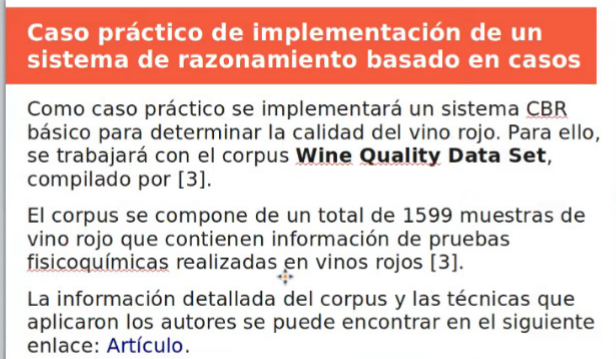

### Implementar un sistema CBR básico para determinar la calidad del vino rojo.
#### Para detectar la similitudi usamos la formula de  Jaccard Similarity
![Jaccard Similarity](https://neo4j.com/docs/graph-data-science/current/images/jaccard.png)   
#### El desarrollo se lo realizara en Python/jupyter Notebook. 

#### •	Cálculo del método.  El medo lee los datos brindados de winequality-red.scv y calcula la similitud de acuerdo a la forma y a los datos de parametros, que son el nuevo vieno.
#### https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/


In [ ]:
from flask import Flask, render_template, request
app = Flask(__name__)

def calcular_similitud_jaccard(valores_vino):
    """
    Metodo que recoree el data set y calcula la similitud con el nuevo vino
    """
    def calculo_similitud(calidad, set_valores_vino):
        """
        Reliza el calculo de similitud de jaccard
        """
        return {
            'calidad': calidad,
            'similitud': len(set_valores_vino.intersection(valores_vino)) /
                         len(set_valores_vino.union(valores_vino))
        }

    lista_calculada = []
    with open("/home/RobertoPacho/Documentos/Sistemas_Expertos/winequality-red.csv", "r") as f:
        valores_vino_data = f.readline()
        while valores_vino_data:
            valores_vino_data = f.readline()
            propiedades_vino = valores_vino_data.split(";")
            calidad = propiedades_vino[-1:][0].replace("\n", "")
            lista_calculada.append(calculo_similitud(calidad, set(map(float, propiedades_vino[:-1]))))
    # Retorna las similitudes y su calidad
    return sorted(lista_calculada, key=lambda item: item['similitud'], reverse=True)



@app.route('/calculo_similitud', methods=['POST'])
def calcular_calidad():
    valores_vino = list(map(float, request.form.values()))
    return render_template("index.html", valores=valores_vino, lista=calcular_similitud_jaccard(valores_vino))


@app.route('/')
def hello_world():
    return render_template("index.html")


if __name__ == '__main__':
    app.run()
    

#### •	 Interfaz usando Flask


#### •	 Templete Index
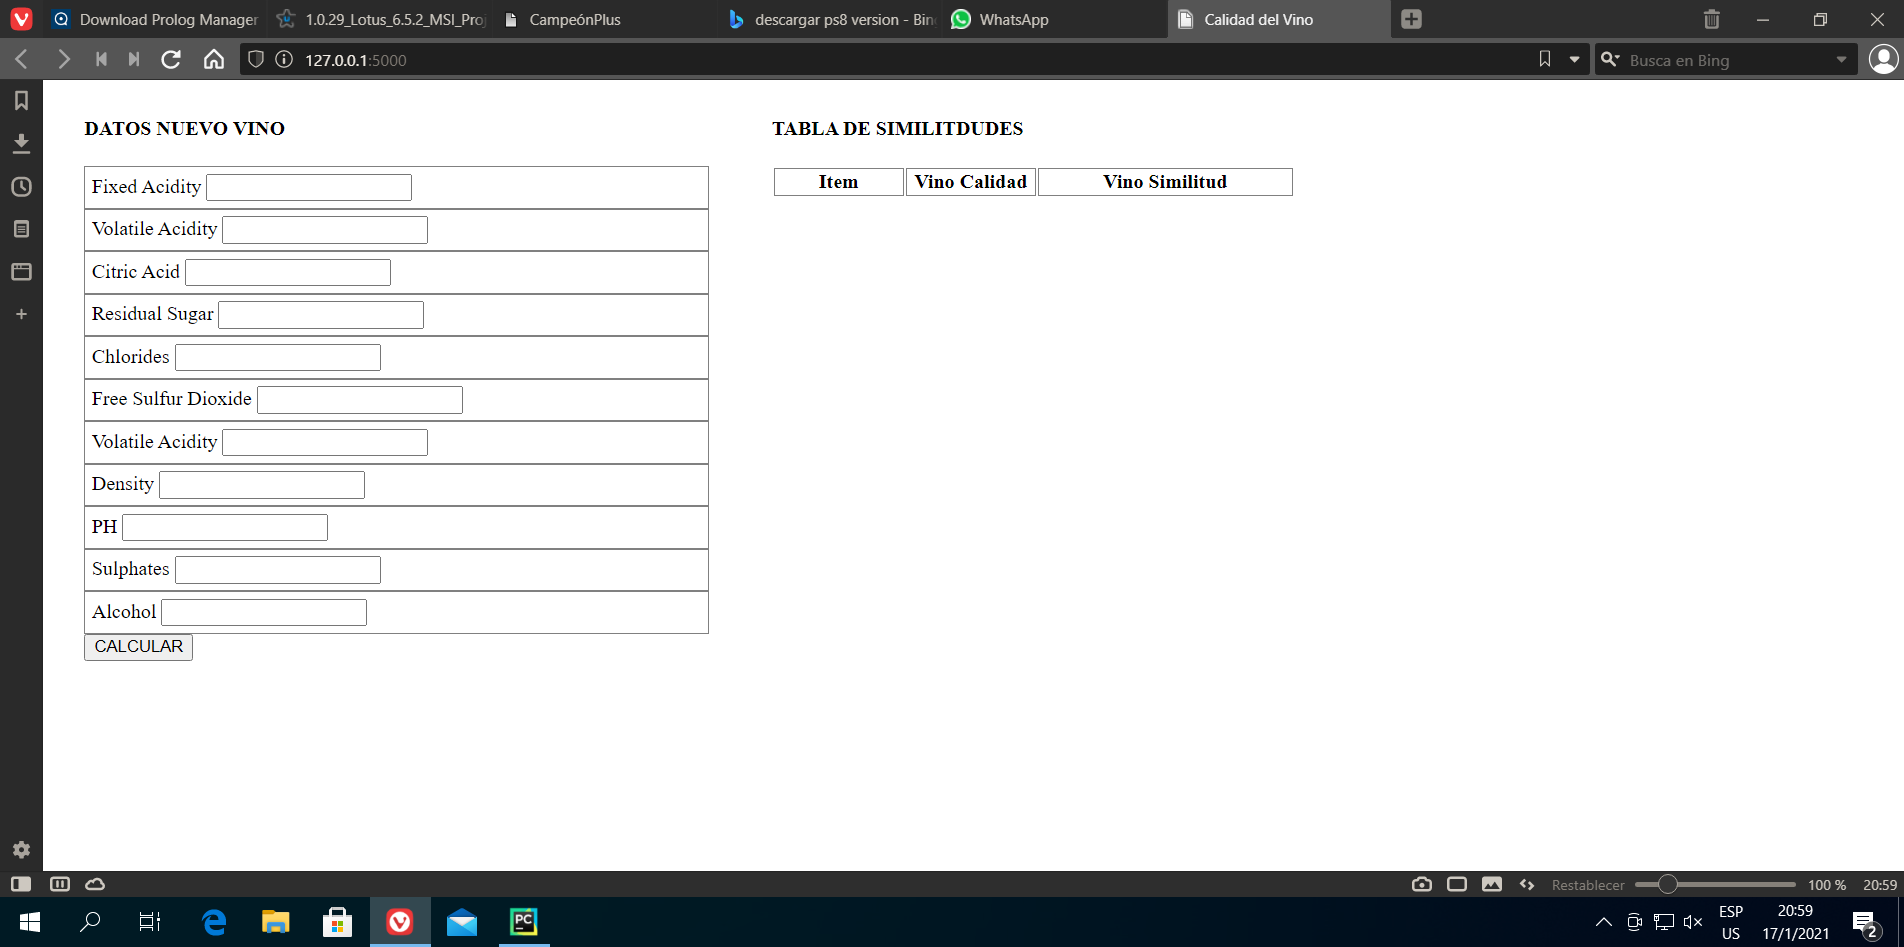

#### •	 Hacemos el ingreso de un nuevo vino y vemos su similitud
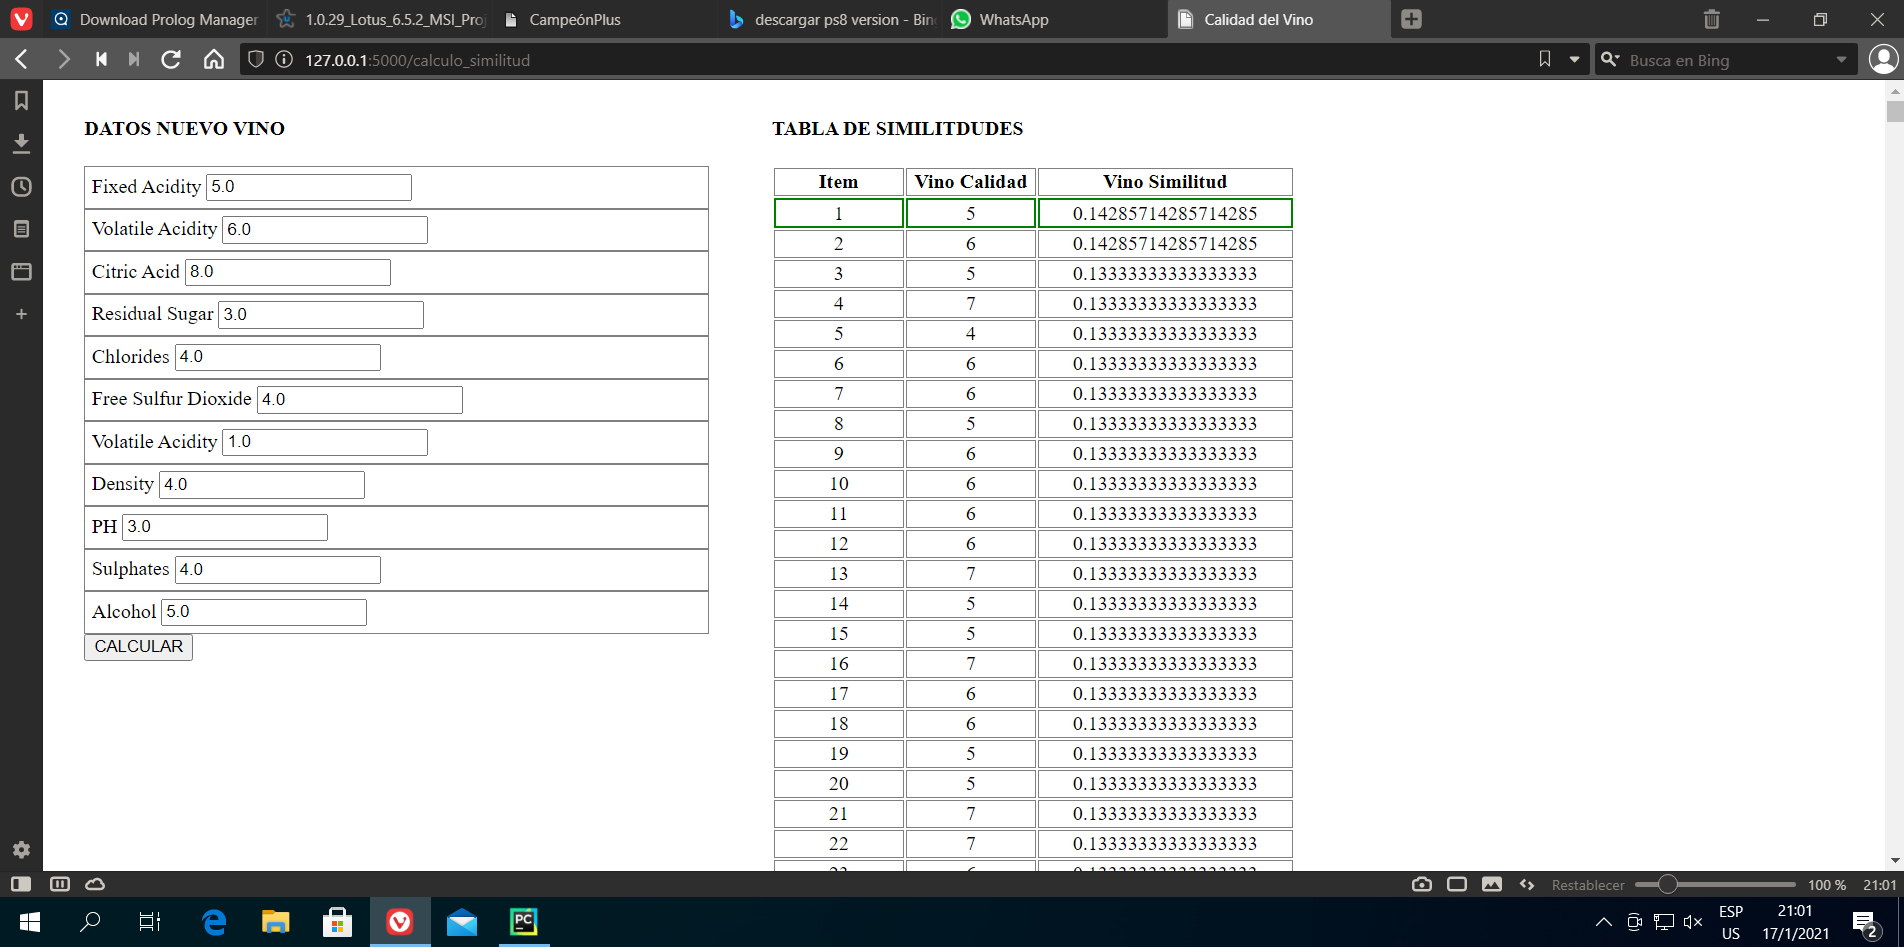 

